IMPORTING MODULES

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow import math

IMPORTING DATASET

In [112]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print('-'*20+'Dataset Loaded'+'-'*20)

--------------------Dataset Loaded--------------------


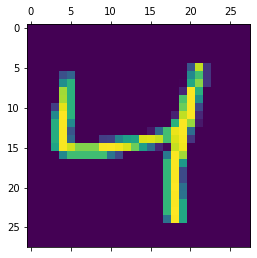

In [113]:
plt.matshow(X_train[2])

In [114]:
print('X_train shape=',X_train.shape)
print('X_test shape=',X_test.shape)

X_train shape= (60000, 28, 28)
X_test shape= (10000, 28, 28)


In [115]:
X_train=X_train/255
X_test=X_test/255

In [120]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

BUILDING OUR MODEL

In [123]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

FITTING OUR MODEL ON THE LOADED DATASET

In [124]:
model.fit(X_train_flattened,y_train,epochs=60,batch_size=256)

Epoch 1/60
235/235 [==============================] - 2s 5ms/step - loss: 0.9531 - accuracy: 0.6877
Epoch 2/60
235/235 [==============================] - 1s 5ms/step - loss: 0.4280 - accuracy: 0.8785
Epoch 3/60
235/235 [==============================] - 1s 5ms/step - loss: 0.3385 - accuracy: 0.9055
Epoch 4/60
235/235 [==============================] - 1s 5ms/step - loss: 0.2924 - accuracy: 0.9191
Epoch 5/60
235/235 [==============================] - 1s 5ms/step - loss: 0.2700 - accuracy: 0.9264
Epoch 6/60
235/235 [==============================] - 1s 5ms/step - loss: 0.2418 - accuracy: 0.9334
Epoch 7/60
235/235 [==============================] - 1s 4ms/step - loss: 0.2229 - accuracy: 0.9378
Epoch 8/60
235/235 [==============================] - 1s 5ms/step - loss: 0.2108 - accuracy: 0.9417
Epoch 9/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1995 - accuracy: 0.9442
Epoch 10/60
235/235 [==============================] - 2s 7ms/step - loss: 0.1904 - accuracy: 0.9469

EVALUATING THE PERFORMANCE OF OUR MODEL ON TEST DATASET

In [125]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1037 - accuracy: 0.9737


[0.10374222695827484, 0.9736999869346619]

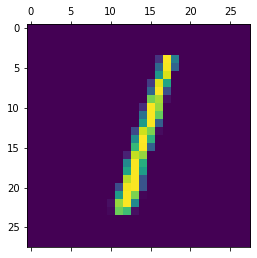

In [126]:
plt.matshow(X_test[2])

In [127]:
y_pred=model.predict(X_test_flattened)
np.argmax(y_pred[2])

1

In [128]:
y_pred_lb=[np.argmax(i) for i in y_pred]

Text(114.0, 0.5, 'Truth')

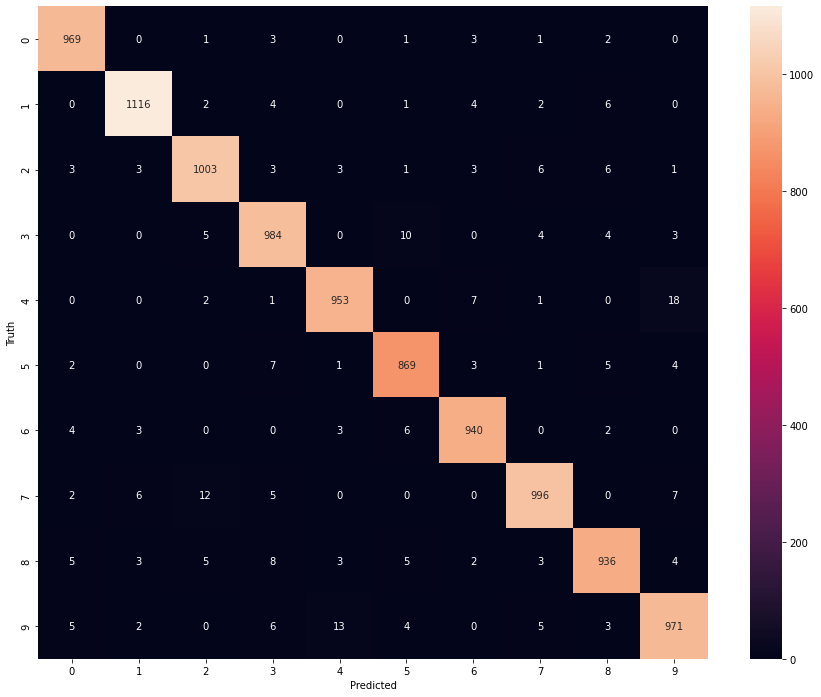

In [129]:
cm=tf.math.confusion_matrix(labels= y_test, predictions= y_pred_lb)

plt.figure(figsize=(15,12))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
